In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM

In [2]:
data = pd.read_csv("style/style.csv")
data.tail()

,brand_name,brand_label,product_name,product_label,file
2179,Yves Saint Laurent,6,earrings,9,6_9_017.png
2180,Yves Saint Laurent,6,earrings,9,6_9_018.png
2181,Yves Saint Laurent,6,earrings,9,6_9_019.png
2182,Yves Saint Laurent,6,earrings,9,6_9_020.png
2183,Yves Saint Laurent,6,earrings,9,6_9_021.png


In [3]:
import h5py

f = h5py.File('StyleColorImages.h5', 'r')

# List all groups
keys = list(f.keys())
keys

['brands', 'images', 'products']

In [4]:
# Create tensors and targets
brands = np.array(f[keys[0]])
images = np.array(f[keys[1]])
products = np.array(f[keys[2]])

print ('Image shape:', images.shape)
print ('Brand shape', brands.shape)
print ('Product shape', products.shape)

Image shape: (2184, 150, 150, 3)
Brand shape (2184,)
Product shape (2184,)


In [5]:
# Normalize tensors
images = images.astype('float32')/255

In [6]:
from keras.utils.np_utils import to_categorical
# One-hot encode the brands
cat_brands = to_categorical(brands, 7)
cat_brands.shape

Using TensorFlow backend.


(2184, 7)

In [7]:
# One-hot encode the products
cat_products = to_categorical(products, 10)
cat_products.shape

(2184, 10)

In [8]:
# Create multi-label targets
targets = np.concatenate((cat_brands, cat_products), axis=1)
targets.shape

(2184, 17)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(images, targets, test_size = 0.4, random_state = 1)

In [10]:
rbm = BernoulliRBM()

rbm.learning_rate = 0.06
rbm.n_iter = 20
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100


# Training RBM-Logistic Pipeline
rbm.fit(X_train.reshape(-1,2))

BernoulliRBM(batch_size=10, learning_rate=0.06, n_components=100, n_iter=20,
       random_state=None, verbose=0)

In [19]:
rbm.components_.shape

(100, 2)

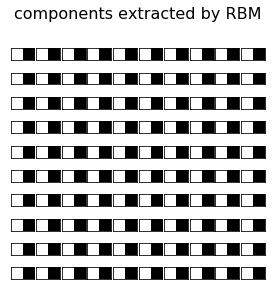

In [24]:
plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape(-1,2), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)


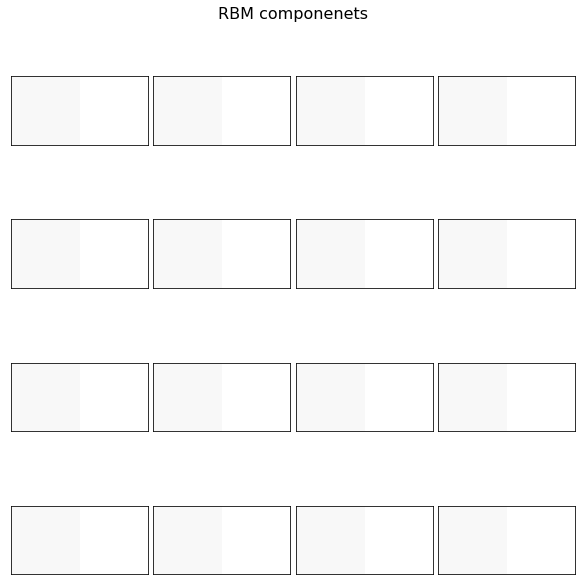

In [25]:
comp = rbm.components_
image_shape = (-1, 2)
def plot_gallery(title, images, n_col, n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,            
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
    plt.show()    
plot_gallery('RBM componenets', comp[:16], 4,4)